In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

## Block

In [8]:
def conv_maxpool_batchnorm_relu(x, filters, kernel_size):
    x = layers.Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               padding='same')(x)
    
    #x=  layers.MaxPool2D(pool_size=(2,2),padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    return x

## Identity Block

In [9]:
def layer_concate(tensor,filters):
    x=conv_maxpool_batchnorm_relu(tensor,filters,kernel_size=3)
    #x=layers.Conv2D(filters=filters,kernel_size=5,padding='same',activation='relu')(x)
    x=layers.Concatenate()([x,tensor])
    return x

In [10]:
inputs=layers.Input(shape=(224,224,3))

In [11]:
x=conv_maxpool_batchnorm_relu(inputs,filters=32,kernel_size=3)

In [12]:
x=layer_concate(x,filters=32)

In [ ]:
x=layers.MaxPool2D(pool_size=(2,2))(x)

In [13]:
output=layers.Dense(6,activation='softmax')(x)

In [14]:
model=keras.Model(inputs,output)

In [15]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 224, 224, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 224, 224, 32) 128         conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 224, 224, 32) 9248        batch_normalization_3[0][0]      
_______________________________________________________________________________________

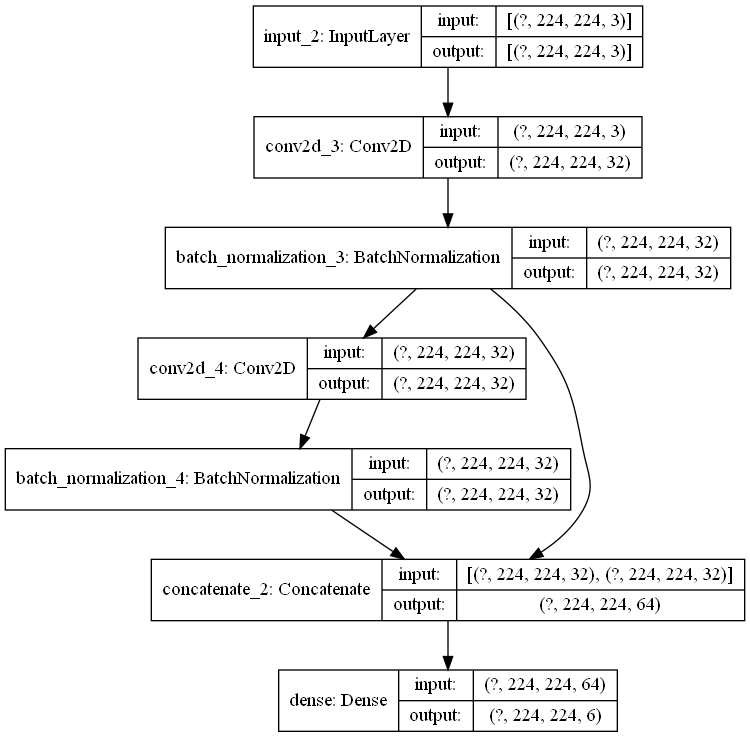

In [16]:
keras.utils.plot_model(model,'newModel.png',show_shapes=True)